In [1]:
#!pip install tensorflow tensorflow_decision_forests
#!pip3 install -U lazypredict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow_decision_forests as tfdf

In [3]:
dft = pd.read_csv("/kaggle/input/ml-olympiad-into-the-space/train.csv")
dfs = pd.read_csv("/kaggle/input/ml-olympiad-into-the-space/test.csv")

In [4]:
dft.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
dft.drop(['PassengerId','RoomService','FoodCourt', 'ShoppingMall', 'Spa' ,'VRDeck', 'Name'],axis=1,inplace=True)

In [6]:
dfs.drop(['RoomService','FoodCourt', 'ShoppingMall', 'Spa' ,'VRDeck', 'Name'],axis=1,inplace=True)

In [7]:
dft['Deck'] = dft['Cabin'].apply(lambda x: str(x)[:1])
dft['Num'] = dft['Cabin'].apply(lambda x: str(x)[2:3])
dft['Side'] = dft['Cabin'].apply(lambda x: str(x)[-1:])

In [8]:
dfs['Deck'] = dfs['Cabin'].apply(lambda x: str(x)[:1])
dfs['Num'] = dfs['Cabin'].apply(lambda x: str(x)[2:3])
dfs['Side'] = dfs['Cabin'].apply(lambda x: str(x)[-1:])

In [9]:
dft.drop(['Cabin'],axis=1,inplace=True)
dfs.drop(['Cabin'],axis=1,inplace=True)

In [10]:
dft.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S


In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [12]:
dft.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported',
       'Deck', 'Num', 'Side'],
      dtype='object')

In [13]:
lbl = LabelEncoder()

dft['homeplanet'] = lbl.fit_transform(dft['HomePlanet'])
dft['cryosleep'] = lbl.fit_transform(dft['CryoSleep'])
dft['destination'] = lbl.fit_transform(dft['Destination'])
dft['vip'] = lbl.fit_transform(dft['VIP'])
dft['transported'] = lbl.fit_transform(dft['Transported'])
dft['deck'] = lbl.fit_transform(dft['Deck'])
dft['num'] = lbl.fit_transform(dft['Num'])
dft['side'] = lbl.fit_transform(dft['Side'])

In [14]:
dft.drop(['HomePlanet', 'CryoSleep', 'Destination','VIP', 'Transported','Deck', 'Num', 'Side'],axis=1, inplace=True)

In [15]:
dft['Age'].fillna(dft['Age'].mean(),inplace=True)

In [16]:
dft['Age'] = dft.Age.astype('int')

In [17]:
dft.head()

,Age,homeplanet,cryosleep,destination,vip,transported,deck,num,side
0,39,1,0,2,0,0,1,0,0
1,24,0,0,2,0,1,5,0,1
2,58,1,0,2,1,0,0,0,1
3,33,1,0,2,0,0,0,0,1
4,16,0,0,2,0,1,5,1,1


In [18]:
dfs.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,F,5,S


In [19]:
dfs['homeplanet'] = lbl.fit_transform(dfs['HomePlanet'])
dfs['cryosleep'] = lbl.fit_transform(dfs['CryoSleep'])
dfs['destination'] = lbl.fit_transform(dfs['Destination'])
dfs['vip'] = lbl.fit_transform(dfs['VIP'])
dfs['deck'] = lbl.fit_transform(dfs['Deck'])
dfs['num'] = lbl.fit_transform(dfs['Num'])
dfs['side'] = lbl.fit_transform(dfs['Side'])

In [20]:
dfs.drop(['HomePlanet', 'CryoSleep', 'Destination','VIP','Deck', 'Num', 'Side'],axis=1, inplace=True)

In [21]:
dfs['Age'].fillna(dfs['Age'].mean(),inplace=True)

In [22]:
dfs['Age'] = dfs.Age.astype('int')

In [23]:
dfs.head()

,PassengerId,Age,homeplanet,cryosleep,destination,vip,deck,num,side
0,0013_01,27,0,1,2,0,6,3,1
1,0018_01,19,0,0,2,0,5,4,1
2,0019_01,31,1,1,0,0,2,0,1
3,0021_01,38,1,0,2,0,2,1,1
4,0023_01,20,0,0,2,0,5,5,1


In [24]:
dfs.shape

(4277, 9)

In [25]:
dft.shape

(8693, 9)

In [26]:
df_train = dft.sample(frac=0.8, random_state=0)
df_valid = dft.drop(df_train.index)

x_train = df_train.drop('transported', axis=1)
y_train = df_train['transported']
x_valid = df_valid.drop('transported', axis=1)
y_valid = df_valid['transported']

In [27]:
x_train.head()

,Age,homeplanet,cryosleep,destination,vip,deck,num,side
3601,16,0,0,0,0,5,7,1
6057,2,0,2,3,0,8,10,2
2797,31,0,0,2,0,6,4,1
7110,14,0,0,0,0,5,1,0
8579,30,1,1,0,1,1,2,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, accuracy_score , r2_score, confusion_matrix, plot_confusion_matrix
#from lazypredict.Supervised import LazyClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [29]:
''''clf = LazyClassifier(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 12,
                     classifiers = 'all')

models, predictions = clf.fit(x_train, x_valid ,y_train , y_valid)'''

"'clf = LazyClassifier(verbose = 0,\n                     ignore_warnings = True,\n                     custom_metric = None,\n                     predictions = False,\n                     random_state = 12,\n                     classifiers = 'all')\n\nmodels, predictions = clf.fit(x_train, x_valid ,y_train , y_valid)"

In [30]:
#models

In [31]:
"""from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)"""

"from sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)"

In [32]:
"""# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)"""

'# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(x_train, y_train)'

In [33]:
#rf_random.best_params_

In [34]:
"""space = {'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }"""

'space = {\'max_depth\': hp.quniform("max_depth", 3, 18, 1),\n        \'gamma\': hp.uniform (\'gamma\', 1,9),\n        \'reg_alpha\' : hp.quniform(\'reg_alpha\', 40,180,1),\n        \'reg_lambda\' : hp.uniform(\'reg_lambda\', 0,1),\n        \'colsample_bytree\' : hp.uniform(\'colsample_bytree\', 0.5,1),\n        \'min_child_weight\' : hp.quniform(\'min_child_weight\', 0, 10, 1),\n        \'n_estimators\': 180,\n        \'seed\': 0\n    }'

In [35]:
"""def objective(space):
    clf = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_valid, y_valid)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_valid)
    accuracy = accuracy_score(y_valid, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }"""

'def objective(space):\n    clf = XGBClassifier(\n                    n_estimators =space[\'n_estimators\'], max_depth = int(space[\'max_depth\']), gamma = space[\'gamma\'],\n                    reg_alpha = int(space[\'reg_alpha\']),min_child_weight=int(space[\'min_child_weight\']),\n                    colsample_bytree=int(space[\'colsample_bytree\']))\n    \n    evaluation = [( x_train, y_train), ( x_valid, y_valid)]\n    \n    clf.fit(x_train, y_train,\n            eval_set=evaluation, eval_metric="auc",\n            early_stopping_rounds=10,verbose=False)\n    \n\n    pred = clf.predict(x_valid)\n    accuracy = accuracy_score(y_valid, pred>0.5)\n    print ("SCORE:", accuracy)\n    return {\'loss\': -accuracy, \'status\': STATUS_OK }'

In [36]:
"""trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)"""

'trials = Trials()\n\nbest_hyperparams = fmin(fn = objective,\n                        space = space,\n                        algo = tpe.suggest,\n                        max_evals = 100,\n                        trials = trials)'

In [37]:
#print("The best hyperparameters are : ","\n")
#print(best_hyperparams)

In [38]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_valid)
accuracy_score(y_valid, pred)

0.7498562392179413

In [39]:
confusion_matrix(y_valid, pred)

array([[715, 161],
       [274, 589]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


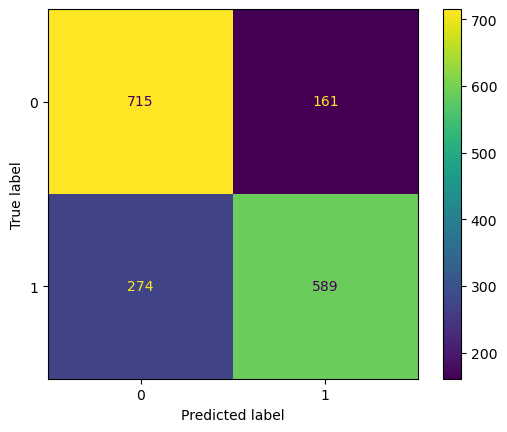

In [40]:
plot_confusion_matrix(model,x_valid,y_valid)

In [41]:
dfss = dfs.drop(['PassengerId'],axis=1)

In [42]:
test_pred = model.predict(dfss)
test_pred

array([0, 0, 1, ..., 1, 0, 1])

In [43]:
dfs['transported'] = test_pred

In [44]:
dfs.drop(['homeplanet', 'cryosleep', 'destination','vip','deck', 'num', 'side','Age'],axis=1, inplace=True)

In [45]:
dfs['transported'] = dfs.transported.astype('bool')

In [46]:
dfs.head()

,PassengerId,transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [47]:
dfs.to_csv('submission.csv',index=False)

In [48]:
#tfds_train = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label='Transported')
#tfds_valid = tfdf.keras.pd_dataframe_to_tf_dataset(df_valid, label='Transported')
#tfds_test = tfdf.keras.pd_dataframe_to_tf_dataset(dfs)

#model = tfdf.keras.GradientBoostedTreesModel()
#model.fit(tfds_train)

#model.summary()

#model.evaluate(tfds_valid)